<a href="https://colab.research.google.com/github/BireNbarik/Metal-Forming-Lab/blob/main/Metal_Forming_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **BPE06003: Metal Forming Lab. 2k22**

Virtual Lab. = [Metal Forming Virtual Simulation Lab.](https://msvs-dei.vlabs.ac.in/)

Colaboratory - Google Research = [Google Colab](https://colab.research.google.com/?utm_source=scs-index) 



---
We are going to use  Virtual Lab. and Google Colab for Metal Forming Lab. 2k22


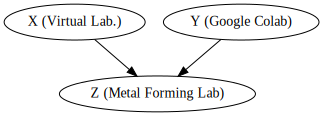

In [ ]:
from graphviz import Digraph # TODO add pygraphviz to dependencies
g = Digraph('Metal Forming Lab.')
g.node('X', label='X (Virtual Lab.)')
g.node('Y', label='Y (Google Colab)')
g.node('Z', label='Z (Metal Forming Lab.)')
g.edge('X','Z')
g.edge('Y', 'Z')
#g.render('Metal Formin_graph', format='png') # Uncomment the line if you want to save the figure
g

## Plotting Stress-Strain Curve



Import necessary packages 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

print("NumPy version:",np.__version__)
print("Pandas version:",pd.__version__)

NumPy version: 1.19.5
Pandas version: 1.1.5


In [7]:
from google.colab import files
uploaded = files.upload()

Saving aluminum6061.xls to aluminum6061.xls
Saving steel1045.xls to steel1045.xls


In [8]:
%ls

aluminum6061.xls  sample_data/  steel1045.xls


In [9]:
steel_df = pd.read_excel("steel1045.xls")
al_df = pd.read_excel("aluminum6061.xls")


WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [10]:
steel_df.head()

,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,762,1,5.969,0.01284,201.030792,0.001572,-0.007133,NaN,NaN,NaN
1,762,2,6.242,0.01392,215.235886,0.000009,-0.014581,NaN,NaN,NaN
2,762,3,6.936,0.01646,246.816742,-0.000832,0.006942,NaN,NaN,NaN
3,762,4,8.632,0.02340,371.870361,0.002203,0.000776,NaN,NaN,NaN
4,762,5,10.533,0.03110,502.501862,0.001481,0.018102,NaN,NaN,NaN


In [11]:
al_df.head()

,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,761,1,6.532,0.01524,201.158508,0.018893,-0.023081,NaN,NaN,NaN
1,761,2,6.702,0.01600,205.978119,0.000265,-0.013024,NaN,NaN,NaN
2,761,3,7.098,0.01720,219.295441,-0.000877,-0.024879,NaN,NaN,NaN
3,761,4,8.697,0.02350,268.505890,0.001453,-0.006798,NaN,NaN,NaN
4,761,5,10.196,0.03004,322.028168,0.001865,0.012563,NaN,NaN,NaN


The equations below show how to calculate stress, σ, and strain, ϵ, from force F and cross-sectional area A. Cross-sectional area A is the formula for the area of a circle. For the steel and aluminum samples we tested, the diameter d was 0.506 in.

σ=FA0
F (kip)=F (lb)×0.001
A0=π(d/2)2
d=0.506 in
ϵ (unitless)=ϵ (%)×0.01

In [16]:
strain_steel = steel_df['CH5']*0.01
d_steel = 0.506    # test bar diameter = 0.506 inches
stress_steel = (steel_df['FORCE']*0.001)/(np.pi*((d_steel/2)**2))

strain_al = al_df['CH5']*0.01
d_al = 0.506       # test bar diameter = 0.506 inches
stress_al = (al_df['FORCE']*0.001)/(np.pi*((d_al/2)**2))

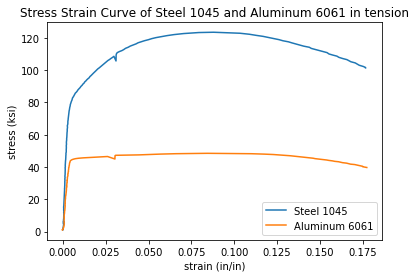

In [19]:
plt.plot(strain_steel,stress_steel,strain_al,stress_al)
plt.xlabel('strain (in/in)')
plt.ylabel('stress (ksi)')
plt.title('Stress Strain Curve of Steel 1045 and Aluminum 6061 in tension')
plt.legend(['Steel 1045','Aluminum 6061'])

plt.savefig('stress-strain_curve.png', dpi=300, bbox_inches='tight')
plt.show()